### Load libraries/packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data

In [5]:
gptReviews = pd.read_csv("chatgpt_reviews.csv")

In [125]:
gptReviews

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,1558c5f6-90b3-468c-856b-428e353758a4,490575543899954542249,Pa****************************S),What type this app,4,3,1.0.0016,2023-07-25 15:01:35
1,1,96d93138-1b82-42b2-bc38-e7d7aee59527,105136107475278461160,MD****AN,I am the first one 😁😁,5,3,NaN,2023-07-25 15:01:54
2,2,e69568f3-b2ec-4f89-afc1-6d09646a8f21,227174291354574282039,So***********oy,Bahut Achcha work,5,2,1.0.0016,2023-07-25 15:02:58
3,3,9c08eb11-cfb6-4023-bb2a-7fdceef094fb,118101522543376663422,Mo***********il,Pretty good UI,4,0,1.0.0016,2023-07-25 15:03:03
4,4,fdaa9cb9-9261-44ff-badb-1ccb45c91d32,285365291129892694152,lo*******ay,First,5,0,1.0.0016,2023-07-25 15:03:58
...,...,...,...,...,...,...,...,...,...
38236,38236,e8285388-960e-4a2e-897f-741266321745,144437545530531990403,Ko************ek,"the new feature where you can talk is great, b...",5,0,1.2023.312,2023-11-16 14:33:58
38237,38237,10e100f6-48ce-4b4d-8be3-aa2cb5773e33,215051535640693357653,Li***an,It's not working at all,1,0,NaN,2023-11-16 14:36:02
38238,38238,ca5b65a5-2b48-457f-8985-ce5cb703599b,144349387899263252781,Um******ir,Sure Super Soundly,5,0,1.2023.307,2023-11-16 14:38:05
38239,38239,d7e37c98-20ba-49ab-a3ea-eb13dc8e5ac1,294976346085012273270,Vi**********uk,great app,5,0,1.0.0039,2023-11-16 14:43:05


In [134]:
len(gptReviews['review_text'][3])

14

In [129]:
data = gptReviews[['review_rating', 'review_likes', 'author_app_version', 'review_timestamp']]
data

,review_rating,review_likes,author_app_version,review_timestamp
0,4,3,1.0.0016,2023-07-25 15:01:35
1,5,3,NaN,2023-07-25 15:01:54
2,5,2,1.0.0016,2023-07-25 15:02:58
3,4,0,1.0.0016,2023-07-25 15:03:03
4,5,0,1.0.0016,2023-07-25 15:03:58
...,...,...,...,...
38236,5,0,1.2023.312,2023-11-16 14:33:58
38237,1,0,NaN,2023-11-16 14:36:02
38238,5,0,1.2023.307,2023-11-16 14:38:05
38239,5,0,1.0.0039,2023-11-16 14:43:05


In [138]:
gpt_length, gpt_width = gptReviews.shape
text_lengths = []
for i in range(0,gpt_length) :
    text_length = len(gptReviews['review_text'][i])
    text_lengths.append(text_length)

In [140]:
data['text_lengths'] = text_lengths

C:\Users\bensn\AppData\Local\Temp\ipykernel_31616\2814999127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_lengths'] = text_lengths


### Explore data

In [148]:
data.shape

(38241, 5)

In [149]:
data.isna().sum()

review_rating            0
review_likes             0
author_app_version    5398
review_timestamp         0
text_lengths             0
dtype: int64

In [150]:
gptReviews.isna().sum()

Unnamed: 0               0
review_id                0
pseudo_author_id         0
author_name              0
review_text              0
review_rating            0
review_likes             0
author_app_version    5398
review_timestamp         0
dtype: int64

In [151]:
data.describe()

,review_rating,review_likes,text_lengths
count,38241.000000,38241.000000,38241.000000
mean,4.409822,0.816349,64.389347
std,1.213238,15.106968,90.296239
min,1.000000,0.000000,1.000000
25%,4.000000,0.000000,12.000000
50%,5.000000,0.000000,30.000000
75%,5.000000,0.000000,75.000000
max,5.000000,1079.000000,500.000000


In [152]:
data.median(numeric_only=True)

review_rating     5.0
review_likes      0.0
text_lengths     30.0
dtype: float64

In [153]:
data.mode(numeric_only=True)

,review_rating,review_likes,text_lengths
0,5,0,4


### Remove nulls and explore more

In [154]:
data_clean = data.dropna(how='any')
data_clean.shape

(32843, 5)

In [155]:
data_clean.describe()

,review_rating,review_likes,text_lengths
count,32843.000000,32843.000000,32843.000000
mean,4.454191,0.943671,66.066985
std,1.153942,16.297357,91.957799
min,1.000000,0.000000,1.000000
25%,5.000000,0.000000,13.000000
50%,5.000000,0.000000,31.000000
75%,5.000000,0.000000,78.000000
max,5.000000,1079.000000,500.000000


In [156]:
data_clean.median(numeric_only=True)

review_rating     5.0
review_likes      0.0
text_lengths     31.0
dtype: float64

In [157]:
data_clean.mode(numeric_only=True)

,review_rating,review_likes,text_lengths
0,5,0,4


In [158]:
app_version = data_clean['author_app_version']
app_version

0          1.0.0016
2          1.0.0016
3          1.0.0016
4          1.0.0016
5          1.0.0016
            ...    
38235    1.2023.307
38236    1.2023.312
38238    1.2023.307
38239      1.0.0039
38240    1.2023.263
Name: author_app_version, Length: 32843, dtype: object

In [159]:
from collections import Counter

In [165]:
version_mc = Counter(app_version).most_common()
version_mc = pd.DataFrame(version_mc)
version_mc

,0,1
0,1.2023.263,4446
1,1.0.0023,3668
2,1.0.0039,3294
3,1.0.0016,3038
4,1.2023.285,1990
5,1.2023.307,1926
6,1.0.0032,1872
7,1.0.0022,1866
8,1.0.0035,1704
9,1.2023.284,1700


In [179]:
data_clean.groupby('author_app_version').describe()

review_rating                                            \
                           count      mean       std  min   25%  50%   75%   
author_app_version                                                           
1.0.0016                  3038.0  4.499013  1.097712  1.0  5.00  5.0  5.00   
1.0.0022                  1866.0  4.359593  1.215563  1.0  4.00  5.0  5.00   
1.0.0023                  3668.0  4.248364  1.346929  1.0  4.00  5.0  5.00   
1.0.0026                   942.0  4.045648  1.490686  1.0  3.00  5.0  5.00   
1.0.0030                   489.0  4.470348  1.112356  1.0  4.00  5.0  5.00   
1.0.0031                   766.0  4.500000  1.081937  1.0  5.00  5.0  5.00   
1.0.0032                  1872.0  4.555556  1.026694  1.0  5.00  5.0  5.00   
1.0.0035                  1704.0  4.440141  1.175172  1.0  4.00  5.0  5.00   
1.0.0039                  3294.0  4.494839  1.123880  1.0  5.00  5.0  5.00   
1.2023.242                1552.0  4.510954  1.075432  1.0  5.00  5.0  5.00   
1.2023.243                1534.0  4.523468  1.092779  1.0  5.00  5.0  5.00   
1.2023.256                 794.0  4.605793  0.944629  1.0  5.00  5.0  5.00   
1.2023.263                4446.0  4.539586  1.053414  1.0  5.00  5.0  5.00   
1.2023.270                   2.0  3.500000  2.121320  2.0  2.75  3.5  4.25   
1.2023.275                   1.0  4.000000       NaN  4.0  4.00  4.0  4.00   
1.2023.277                   2.0  3.000000  2.828427  1.0  2.00  3.0  4.00   
1.2023.278                  36.0  3.805556  1.704103  1.0  2.00  5.0  5.00   
1.2023.279                   7.0  3.571429  1.902379  1.0  2.00  5.0  5.00   
1.2023.281                 906.0  4.569536  1.022465  1.0  5.00  5.0  5.00   
1.2023.284                1700.0  4.548824  1.053861  1.0  5.00  5.0  5.00   
1.2023.285                1990.0  4.441206  1.172121  1.0  5.00  5.0  5.00   
1.2023.298                  10.0  4.500000  1.269296  1.0  5.00  5.0  5.00   
1.2023.299                   3.0  4.333333  0.577350  4.0  4.00  4.0  4.50   
1.2023.306                   5.0  4.600000  0.547723  4.0  4.00  5.0  5.00   
1.2023.307                1926.0  4.438214  1.174656  1.0  5.00  5.0  5.00   
1.2023.312                 290.0  4.344828  1.271891  1.0  4.00  5.0  5.00   

                        review_likes             ...               \
                    max        count       mean  ...  75%     max   
author_app_version                               ...                
1.0.0016            5.0       3038.0   1.005925  ...  0.0   814.0   
1.0.0022            5.0       1866.0   1.846195  ...  0.0   473.0   
1.0.0023            5.0       3668.0   1.890676  ...  0.0  1079.0   
1.0.0026            5.0        942.0   2.350318  ...  0.0   349.0   
1.0.0030            5.0        489.0   1.715746  ...  0.0   476.0   
1.0.0031            5.0        766.0   0.496084  ...  0.0   104.0   
1.0.0032            5.0       1872.0   1.076923  ...  0.0   708.0   
1.0.0035            5.0       1704.0   1.043427  ...  0.0   666.0   
1.0.0039            5.0       3294.0   0.483607  ...  0.0   459.0   
1.2023.242          5.0       1552.0   0.306701  ...  0.0   155.0   
1.2023.243          5.0       1534.0   1.077575  ...  0.0   599.0   
1.2023.256          5.0        794.0   1.152393  ...  0.0   739.0   
1.2023.263          5.0       4446.0   0.333783  ...  0.0   160.0   
1.2023.270          5.0          2.0   1.000000  ...  1.5     2.0   
1.2023.275          4.0          1.0   0.000000  ...  0.0     0.0   
1.2023.277          5.0          2.0   1.000000  ...  1.5     2.0   
1.2023.278          5.0         36.0  11.083333  ...  0.0   390.0   
1.2023.279          5.0          7.0   0.571429  ...  0.0     4.0   
1.2023.281          5.0        906.0   0.357616  ...  0.0   222.0   
1.2023.284          5.0       1700.0   0.735294  ...  0.0   721.0   
1.2023.285          5.0       1990.0   0.536683  ...  0.0   439.0   
1.2023.298          5.0         10.0   0.100000  ...  0.0     1.0   
1.2023.299          5.0        

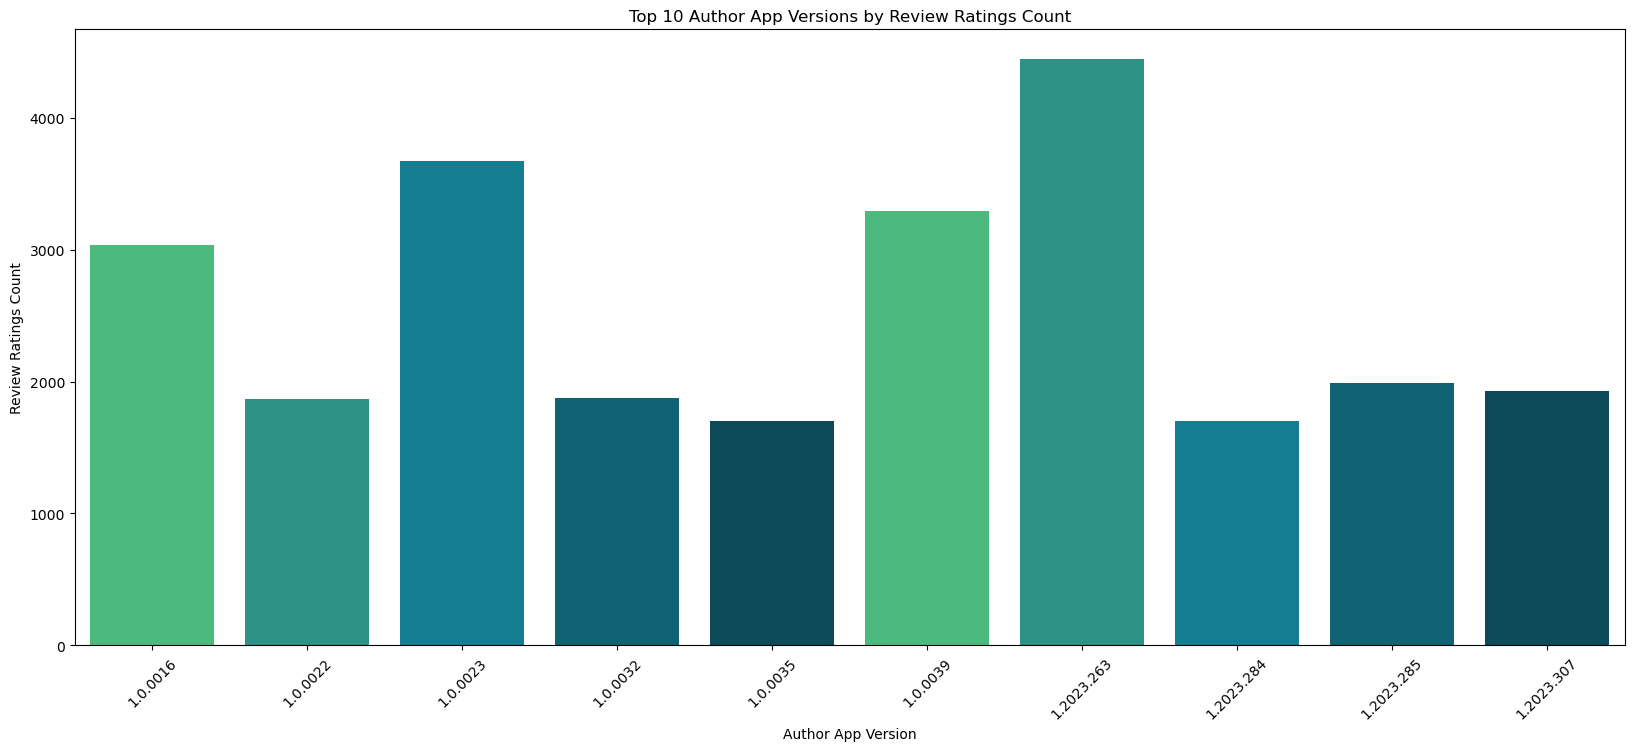

In [182]:
df = data_clean
# Define the ChatGPT color gradient
chatgpt_colors = ["#3ACB7D", "#1CA391", "#008CA7", "#006E82", "#005266"]

# Group by author_app_version and count review ratings
top_app_versions = df.groupby('author_app_version')['review_rating'].count().sort_values(ascending=False).head(10).index.tolist()

# Group by author_app_version and count review ratings, then reset index
app_versions_df = df.groupby(['author_app_version'])['review_rating'].count().reset_index()

# Filter the DataFrame to include only the top app versions
app_versions_df = app_versions_df[app_versions_df['author_app_version'].isin(top_app_versions)]

# Plotting
plt.figure(figsize=(20,8))
sns.barplot(data=app_versions_df, x='author_app_version', y='review_rating', palette=chatgpt_colors)
plt.xlabel('Author App Version')
plt.ylabel('Review Ratings Count')
plt.title('Top 10 Author App Versions by Review Ratings Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [185]:
app_versions_df

,author_app_version,review_rating
0,1.0.0016,3038
1,1.0.0022,1866
2,1.0.0023,3668
6,1.0.0032,1872
7,1.0.0035,1704
8,1.0.0039,3294
12,1.2023.263,4446
19,1.2023.284,1700
20,1.2023.285,1990
24,1.2023.307,1926


### Make some visuals

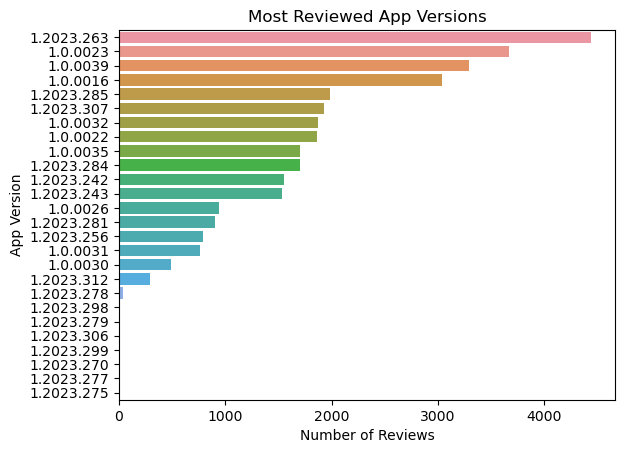

In [258]:
sns.barplot(data=version_mc, y=version_mc[0],x=version_mc[1]);
plt.xlabel('Number of Reviews');
plt.ylabel('App Version');
plt.title('Most Reviewed App Versions');

In [109]:
stats_per_version = data_clean.groupby('author_app_version').mean(numeric_only=True)
stats_per_version = stats_per_version.reset_index()
stats_per_version

,author_app_version,review_rating,review_likes
0,1.0.0016,4.499013,1.005925
1,1.0.0022,4.359593,1.846195
2,1.0.0023,4.248364,1.890676
3,1.0.0026,4.045648,2.350318
4,1.0.0030,4.470348,1.715746
5,1.0.0031,4.500000,0.496084
6,1.0.0032,4.555556,1.076923
7,1.0.0035,4.440141,1.043427
8,1.0.0039,4.494839,0.483607
9,1.2023.242,4.510954,0.306701


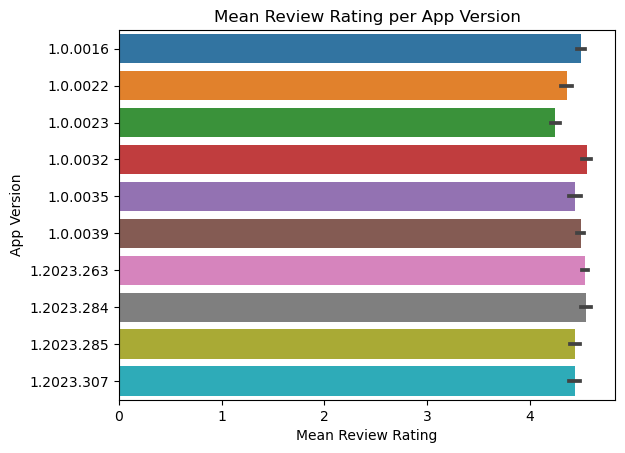

In [255]:
sns.barplot(data=df, y=df['author_app_version'], x=df['review_rating']);
plt.xlabel('Mean Review Rating');
plt.ylabel('App Version');
plt.title('Mean Review Rating per App Version');

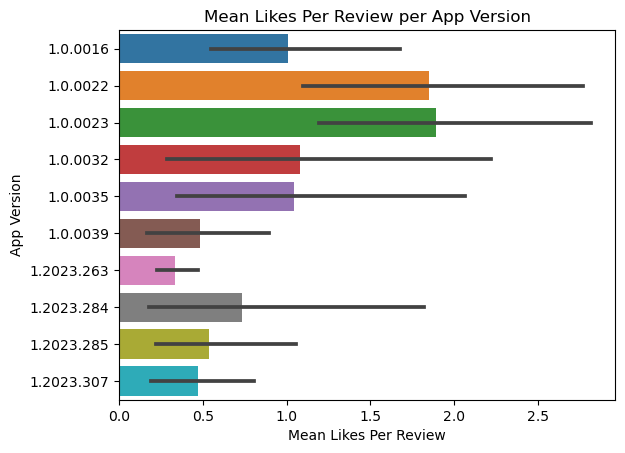

In [256]:
sns.barplot(data=df, y=df['author_app_version'], x=df['review_likes']);
plt.xlabel('Mean Likes Per Review');
plt.ylabel('App Version');
plt.title('Mean Likes Per Review per App Version');

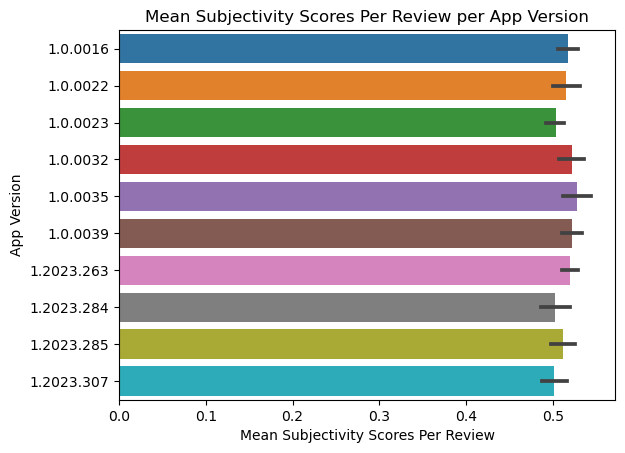

In [421]:
sns.barplot(data=df, y=df['author_app_version'], x=df['subjectivity']);
plt.xlabel('Mean Subjectivity Scores Per Review');
plt.ylabel('App Version');
plt.title('Mean Subjectivity Scores Per Review per App Version');

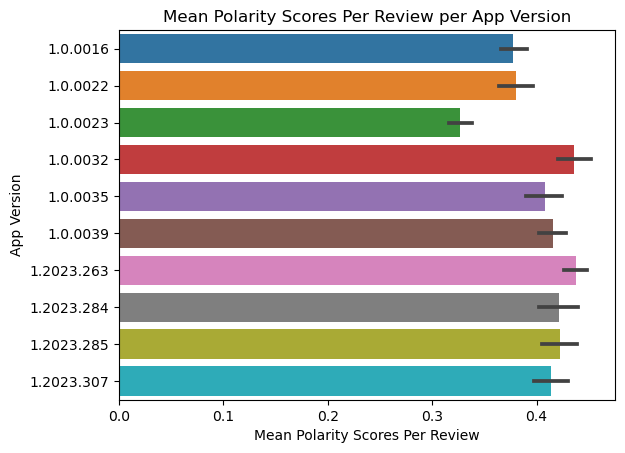

In [423]:
sns.barplot(data=df, y=df['author_app_version'], x=df['polarity']);
plt.xlabel('Mean Polarity Scores Per Review');
plt.ylabel('App Version');
plt.title('Mean Polarity Scores Per Review per App Version');

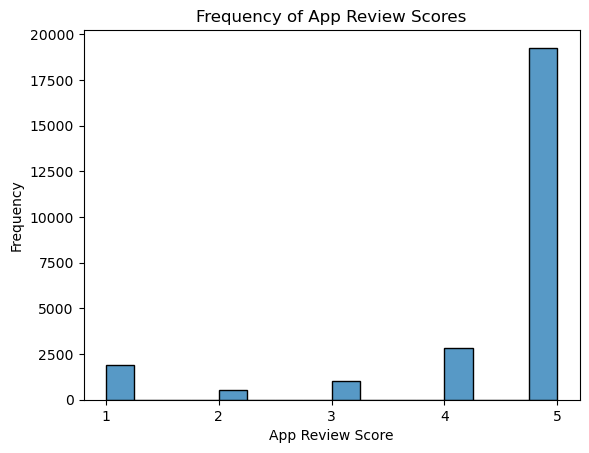

In [251]:
ax = sns.histplot(x = df['review_rating']);
ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_xticklabels(['1', '2', '3', '4', '5']);
plt.xlabel('App Review Score');
plt.ylabel('Frequency');
plt.title('Frequency of App Review Scores');

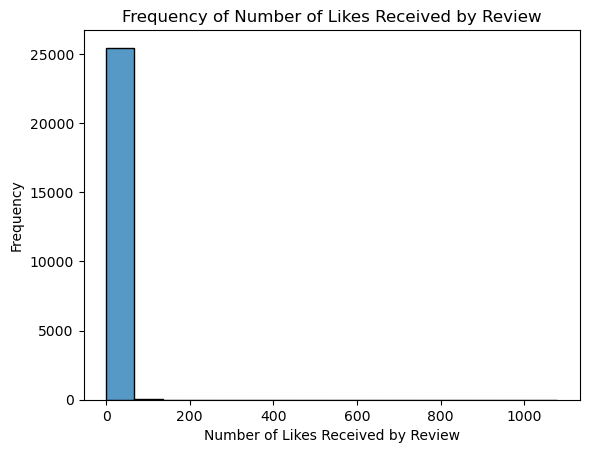

In [252]:
ax = sns.histplot(x = df['review_likes']);
plt.xlabel('Number of Likes Received by Review');
plt.ylabel('Frequency');
plt.title('Frequency of Number of Likes Received by Review');

### Regression Analysis

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Review Rating predicting Review Likes

In [217]:
review_rating = np.array(df['review_rating']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(review_rating, df['review_likes'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

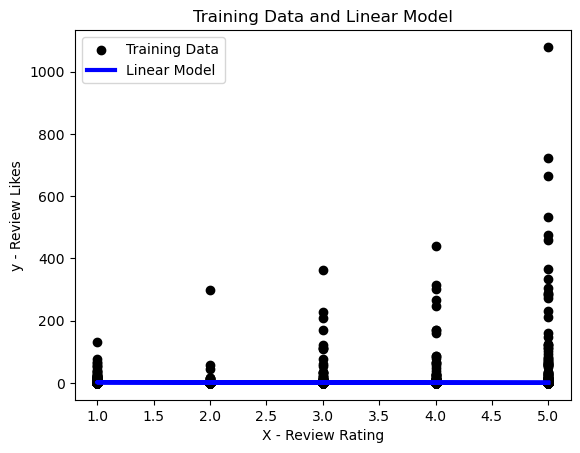

In [218]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Review Rating')
plt.ylabel('y - Review Likes')
plt.legend()
plt.show()

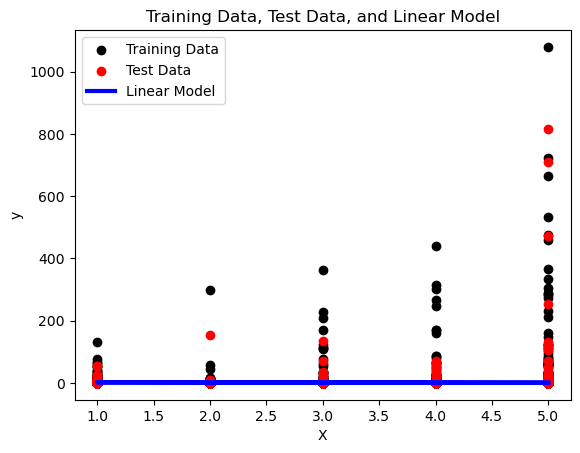

In [219]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [221]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(-r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 309.53
R^2 Score: -0.00
Correlation: 0.01


#### Review Likes predicting Review Ratings

In [222]:
review_likes = np.array(df['review_likes']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(review_likes, df['review_rating'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

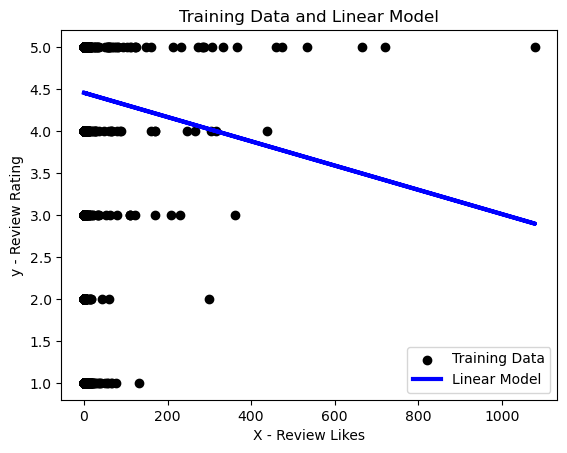

In [223]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Review Likes')
plt.ylabel('y - Review Rating')
plt.legend()
plt.show()
##ax.set_yticks([1, 2, 3, 4, 5]);
##ax.set_yticklabels(['1', '2', '3', '4', '5']);

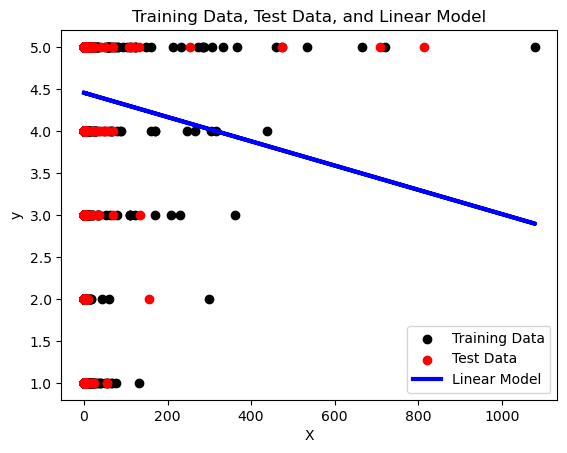

In [224]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [226]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(-r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 1.34
R^2 Score: -0.00
Correlation: 0.01


#### X = subjectivity, y = review_rating

In [229]:
subjectivity = np.array(df['subjectivity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(subjectivity, df['review_rating'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

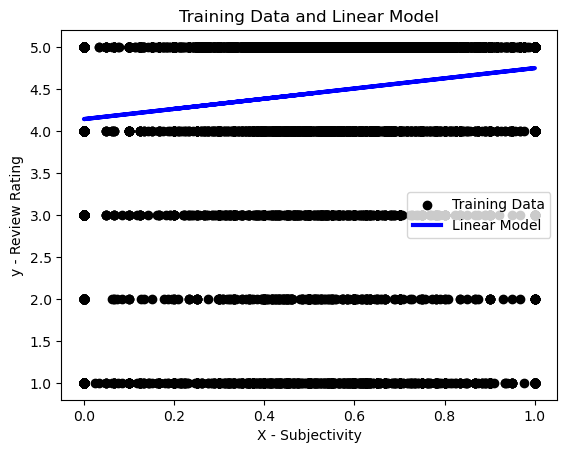

In [231]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Subjectivity')
plt.ylabel('y - Review Rating')
plt.legend()
plt.show()

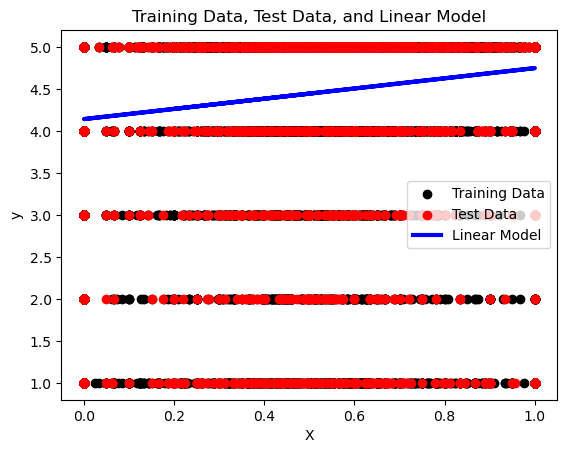

In [232]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [234]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 1.30
R^2 Score: 0.03
Correlation: 0.18


#### X = subjectivity, y = review_likes

In [240]:
subjectivity = np.array(df['subjectivity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(subjectivity, df['review_likes'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

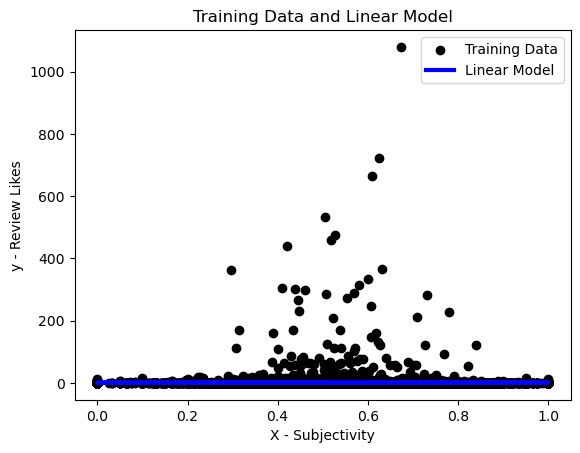

In [242]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Subjectivity')
plt.ylabel('y - Review Likes')
plt.legend()
plt.show()

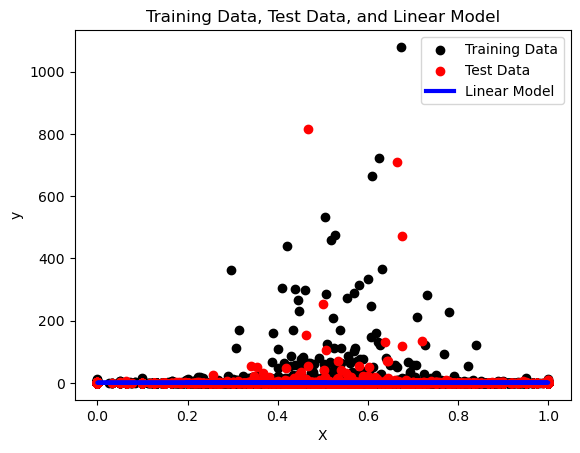

In [243]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [244]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 309.51
R^2 Score: 0.00
Correlation: 0.01


#### X = polarity, y = review_rating

In [235]:
polarity = np.array(df['polarity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(polarity, df['review_rating'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

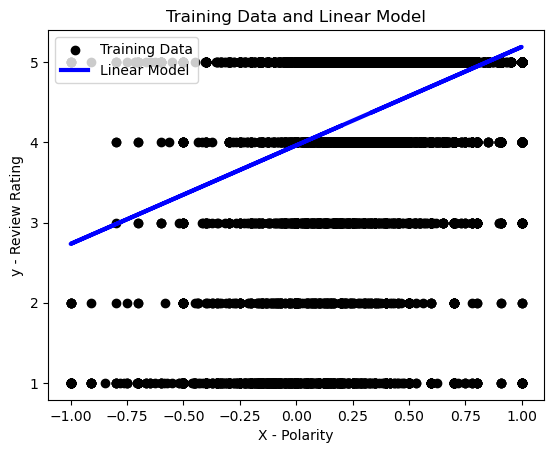

In [237]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Polarity')
plt.ylabel('y - Review Rating')
plt.legend()
plt.show()

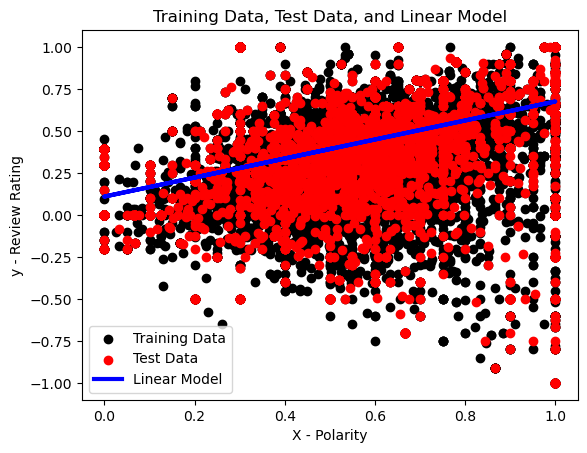

In [425]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X - Polarity')
plt.ylabel('y - Review Rating')
plt.legend()
plt.show()

In [239]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 1.13
R^2 Score: 0.16
Correlation: 0.40


#### X = polarity, y = review_likes

In [247]:
polarity = np.array(df['polarity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(polarity, df['review_likes'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

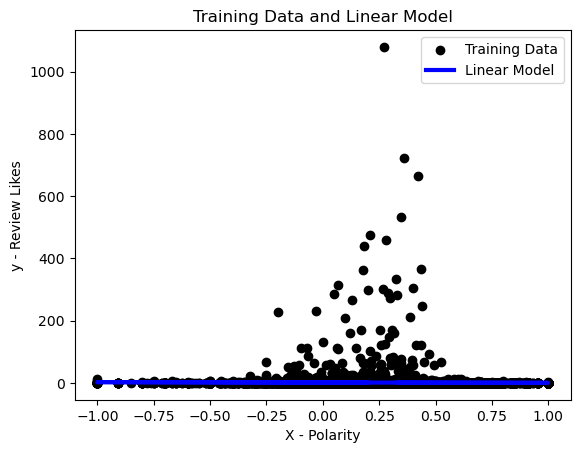

In [248]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Polarity')
plt.ylabel('y - Review Likes')
plt.legend()
plt.show()

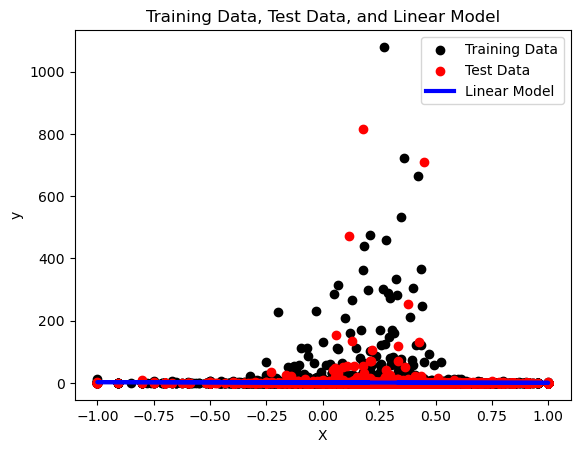

In [249]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [250]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 309.33
R^2 Score: 0.00
Correlation: 0.03


#### X = Subjectivity, y = polarity

In [413]:
subjectivity = np.array(df['subjectivity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(subjectivity, df['polarity'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

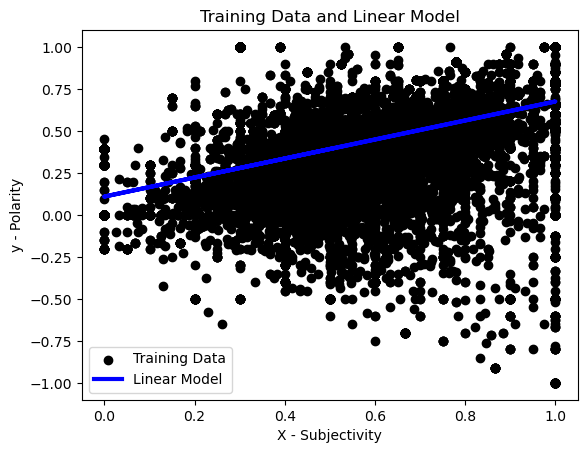

In [414]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data and Linear Model')
plt.xlabel('X - Subjectivity')
plt.ylabel('y - Polarity')
plt.legend()
plt.show()

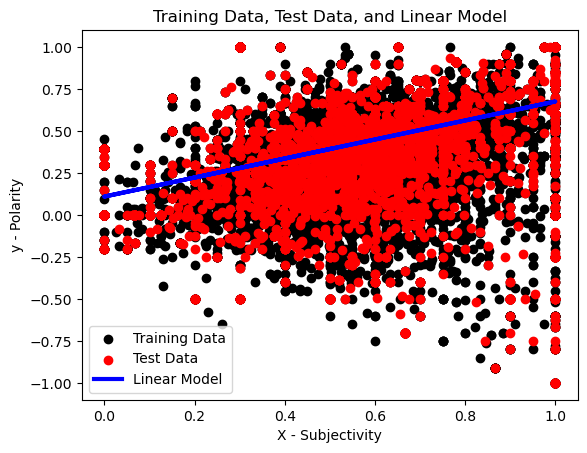

In [424]:
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_pred, color='blue', linewidth=3, label='Linear Model')
plt.title('Training Data, Test Data, and Linear Model')
plt.xlabel('X - Subjectivity')
plt.ylabel('y - Polarity')
plt.legend()
plt.show()

In [416]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
cor = np.sqrt(r2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation: {cor:.2f}")

Mean Squared Error: 0.10
R^2 Score: 0.27
Correlation: 0.52


### K Nearest Neighbor

In [371]:
df = pd.read_csv("reviews_data.csv")
df

,review_text,author_app_version,review_rating,review_likes,CleanReview,subjectivity,polarity,analysis
0,What type this app,1.0.0016,4,3,what type this app,0.000000,0.000000,neutral
1,Bahut Achcha work,1.0.0016,5,2,bahut achcha work,0.000000,0.000000,neutral
2,Pretty good UI,1.0.0016,4,0,pretty good ui,0.800000,0.475000,positive
3,First,1.0.0016,5,0,first,0.333333,0.250000,positive
4,"Love u OpenAI, Open AI Team, Sam Altman and El...",1.0.0016,5,0,love u openai open ai team sam altman and el...,0.550000,0.250000,positive
...,...,...,...,...,...,...,...,...
25499,fantastic,1.2023.307,4,0,fantastic,0.900000,0.400000,positive
25500,Very helpful,1.2023.307,5,0,very helpful,0.300000,0.200000,positive
25501,Sure Super Soundly,1.2023.307,5,0,sure super soundly,0.651852,0.411111,positive
25502,great app,1.0.0039,5,0,great app,0.750000,0.800000,positive


In [372]:
df_knn = df[['author_app_version', 'review_rating', 'review_likes', 'subjectivity', 'polarity', 'analysis']]

In [373]:
df_len, df_wid = df.shape

In [374]:
df_len

25504

In [375]:
df_knn['class'] = ''
df_knn

C:\Users\bensn\AppData\Local\Temp\ipykernel_31616\2801397550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['class'] = ''


,author_app_version,review_rating,review_likes,subjectivity,polarity,analysis,class
0,1.0.0016,4,3,0.000000,0.000000,neutral,
1,1.0.0016,5,2,0.000000,0.000000,neutral,
2,1.0.0016,4,0,0.800000,0.475000,positive,
3,1.0.0016,5,0,0.333333,0.250000,positive,
4,1.0.0016,5,0,0.550000,0.250000,positive,
...,...,...,...,...,...,...,...
25499,1.2023.307,4,0,0.900000,0.400000,positive,
25500,1.2023.307,5,0,0.300000,0.200000,positive,
25501,1.2023.307,5,0,0.651852,0.411111,positive,
25502,1.0.0039,5,0,0.750000,0.800000,positive,


In [376]:
value = ''
for i in range(0, df_len):
    value = df_knn['author_app_version'][i]
    if (value == '1.0.0016'):
        df_knn['class'][i] = 1
    if (value == '1.0.0022'):
        df_knn['class'][i] = 2        
    if (value == '1.0.0023'):
        df_knn['class'][i] = 3
    if (value == '1.0.0032'):
        df_knn['class'][i] = 4
    if (value == '1.0.0035'):
        df_knn['class'][i] = 5
    if (value == '1.0.0039'):
        df_knn['class'][i] = 6
    if (value == '1.2023.263'):
        df_knn['class'][i] = 7
    if (value == '1.2023.284'):
        df_knn['class'][i] = 8
    if (value == '1.2023.285'):
        df_knn['class'][i] = 9
    if (value == '1.2023.307'):
        df_knn['class'][i] = 10
    value=''

C:\Users\bensn\AppData\Local\Temp\ipykernel_31616\4177619930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['class'][i] = 1
C:\Users\bensn\AppData\Local\Temp\ipykernel_31616\4177619930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['class'][i] = 2
C:\Users\bensn\AppData\Local\Temp\ipykernel_31616\4177619930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn['class'][i] = 3
C:\Users\bensn\AppData\Local\Te

In [405]:
df_knn

,author_app_version,review_rating,review_likes,subjectivity,polarity,analysis,class
0,1.0.0016,4,3,0.000000,0.000000,neutral,1
1,1.0.0016,5,2,0.000000,0.000000,neutral,1
2,1.0.0016,4,0,0.800000,0.475000,positive,1
3,1.0.0016,5,0,0.333333,0.250000,positive,1
4,1.0.0016,5,0,0.550000,0.250000,positive,1
...,...,...,...,...,...,...,...
25499,1.2023.307,4,0,0.900000,0.400000,positive,10
25500,1.2023.307,5,0,0.300000,0.200000,positive,10
25501,1.2023.307,5,0,0.651852,0.411111,positive,10
25502,1.0.0039,5,0,0.750000,0.800000,positive,6


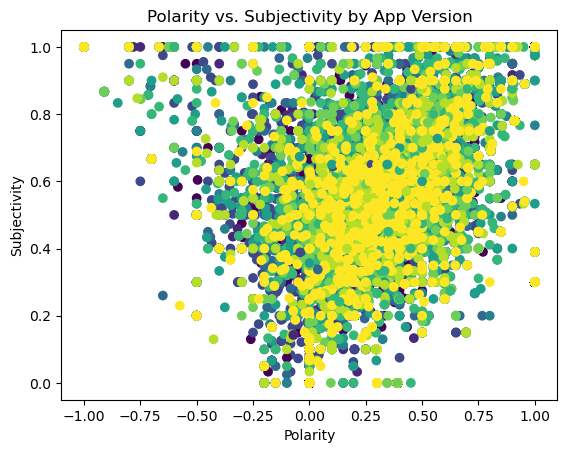

In [419]:
plt.scatter(x=df_knn['polarity'], y=df_knn['subjectivity'], c=df_knn['class']);
plt.xlabel('Polarity');
plt.ylabel('Subjectivity');
plt.title('Polarity vs. Subjectivity by App Version');

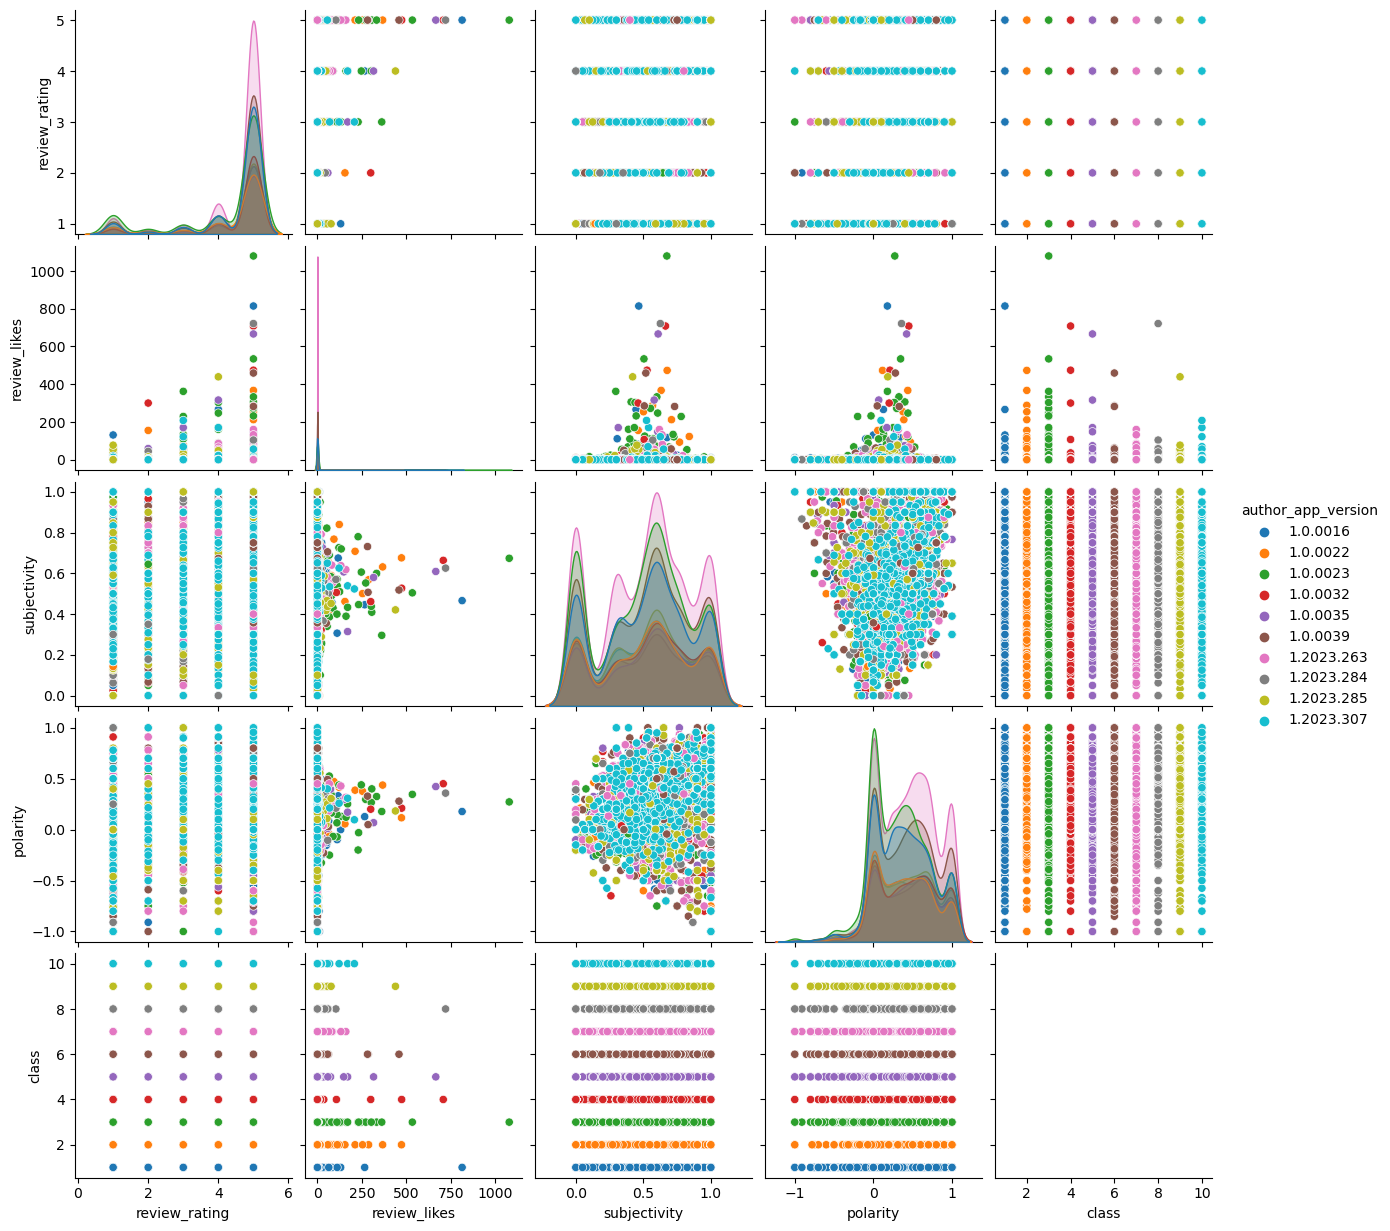

In [394]:
sns.pairplot(df_knn, hue='author_app_version');

#### X = polarity, subjectivity, review_likes, and review_rating; classifying by author_app_version

In [381]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [406]:
X = df_knn[['review_rating', 'review_likes', 'subjectivity', 'polarity']]
X_train, X_test, y_train, y_test = train_test_split(X, df_knn['author_app_version'], test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [407]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

Accuracy Score: 0.13%


In [408]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[166  88  88  45  35  26 116  20   5   5]
 [105  49  65  39  29  25  78  11   3   1]
 [179 112 140  55  36  41 144  27   5   3]
 [ 68  60  63  29  22  22  75  28   5   2]
 [ 72  45  65  23  25  27  59  17   3   2]
 [153  75 121  65  48  47 149  26   4   3]
 [192  75 127  84  64  58 194  40  10   4]
 [ 73  36  52  34  29  24  82  12   4   3]
 [ 71  35  77  36  28  27  94  20   3   4]
 [ 78  39  69  32  24  11  83  23   3   3]]


In [409]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

    1.0.0016       0.14      0.28      0.19       594
    1.0.0022       0.08      0.12      0.10       405
    1.0.0023       0.16      0.19      0.17       742
    1.0.0032       0.07      0.08      0.07       374
    1.0.0035       0.07      0.07      0.07       338
    1.0.0039       0.15      0.07      0.09       691
  1.2023.263       0.18      0.23      0.20       848
  1.2023.284       0.05      0.03      0.04       349
  1.2023.285       0.07      0.01      0.01       395
  1.2023.307       0.10      0.01      0.02       365

    accuracy                           0.13      5101
   macro avg       0.11      0.11      0.10      5101
weighted avg       0.12      0.13      0.12      5101



In [411]:
df = pd.read_csv("reviews_data.csv")
df

,review_text,author_app_version,review_rating,review_likes,CleanReview,subjectivity,polarity,analysis
0,What type this app,1.0.0016,4,3,what type this app,0.000000,0.000000,neutral
1,Bahut Achcha work,1.0.0016,5,2,bahut achcha work,0.000000,0.000000,neutral
2,Pretty good UI,1.0.0016,4,0,pretty good ui,0.800000,0.475000,positive
3,First,1.0.0016,5,0,first,0.333333,0.250000,positive
4,"Love u OpenAI, Open AI Team, Sam Altman and El...",1.0.0016,5,0,love u openai open ai team sam altman and el...,0.550000,0.250000,positive
...,...,...,...,...,...,...,...,...
25499,fantastic,1.2023.307,4,0,fantastic,0.900000,0.400000,positive
25500,Very helpful,1.2023.307,5,0,very helpful,0.300000,0.200000,positive
25501,Sure Super Soundly,1.2023.307,5,0,sure super soundly,0.651852,0.411111,positive
25502,great app,1.0.0039,5,0,great app,0.750000,0.800000,positive


In [214]:
df.groupby('author_app_version').describe()

review_rating                                               \
                           count      mean       std  min  25%  50%  75%  max   
author_app_version                                                              
1.0.0016                  3038.0  4.499013  1.097712  1.0  5.0  5.0  5.0  5.0   
1.0.0022                  1866.0  4.359593  1.215563  1.0  4.0  5.0  5.0  5.0   
1.0.0023                  3668.0  4.248364  1.346929  1.0  4.0  5.0  5.0  5.0   
1.0.0032                  1872.0  4.555556  1.026694  1.0  5.0  5.0  5.0  5.0   
1.0.0035                  1704.0  4.440141  1.175172  1.0  4.0  5.0  5.0  5.0   
1.0.0039                  3294.0  4.494839  1.123880  1.0  5.0  5.0  5.0  5.0   
1.2023.263                4446.0  4.539586  1.053414  1.0  5.0  5.0  5.0  5.0   
1.2023.284                1700.0  4.548824  1.053861  1.0  5.0  5.0  5.0  5.0   
1.2023.285                1990.0  4.441206  1.172121  1.0  5.0  5.0  5.0  5.0   
1.2023.307                1926.0  4.438214  1.174656  1.0  5.0  5.0  5.0  5.0   

                   review_likes            ... subjectivity      polarity  \
                          count      mean  ...          75%  max    count   
author_app_version                         ...                              
1.0.0016                 3038.0  1.005925  ...         0.75  1.0   3038.0   
1.0.0022                 1866.0  1.846195  ...         0.75  1.0   1866.0   
1.0.0023                 3668.0  1.890676  ...         0.75  1.0   3668.0   
1.0.0032                 1872.0  1.076923  ...         0.78  1.0   1872.0   
1.0.0035                 1704.0  1.043427  ...         0.78  1.0   1704.0   
1.0.0039                 3294.0  0.483607  ...         0.78  1.0   3294.0   
1.2023.263               4446.0  0.333783  ...         0.78  1.0   4446.0   
1.2023.284               1700.0  0.735294  ...         0.78  1.0   1700.0   
1.2023.285               1990.0  0.536683  ...         0.75  1.0   1990.0   
1.2023.307               1926.0  0.473001  ...         0.75  1.0   1926.0   

                                                                                
                        mean       std  min       25%       50%       75%  max  
author_app_version                                                              
1.0.0016            0.377744  0.357498 -1.0  0.020556  0.366667  0.616667  1.0  
1.0.0022            0.380026  0.359135 -1.0  0.000000  0.375000  0.662500  1.0  
1.0.0023            0.326997  0.362322 -1.0  0.000000  0.312500  0.600000  1.0  
1.0.0032            0.436093  0.370464 -1.0  0.055417  0.450000  0.700000  1.0  
1.0.0035            0.407797  0.373190 -1.0  0.050000  0.407778  0.700000  1.0  
1.0.0039            0.415540  0.372974 -1.0  0.066667  0.431944  0.700000  1.0  
1.2023.263          0.437311  0.362894 -1.0  0.134878  0.466667  0.700000  1.0  
1.2023.284          0.421776  0.368302 -1.0  0.049362  0.433333  0.700000  1.0  
1.2023.285          0.422305  0.379373 -1.0  0.100000  0.438194  0.700000  1.0  
1.2023.307          0.413610  0.370099 -1.0  0.050000  0.400000  0.700000  1.0  

[10 rows x 32 columns]